<a href="https://colab.research.google.com/github/rachit-shah/adbi-project/blob/master/ADBI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp gdrive/'My Drive'/bbc-fulltext.zip .
!cp gdrive/'My Drive'/glove.6B.zip .

In [23]:
!unzip bbc-fulltext.zip

Archive:  bbc-fulltext.zip
   creating: bbc/
   creating: bbc/business/
  inflating: bbc/business/001.txt    
  inflating: bbc/business/002.txt    
  inflating: bbc/business/003.txt    
  inflating: bbc/business/004.txt    
  inflating: bbc/business/005.txt    
  inflating: bbc/business/006.txt    
  inflating: bbc/business/007.txt    
  inflating: bbc/business/008.txt    
  inflating: bbc/business/009.txt    
  inflating: bbc/business/010.txt    
  inflating: bbc/business/011.txt    
  inflating: bbc/business/012.txt    
  inflating: bbc/business/013.txt    
  inflating: bbc/business/014.txt    
  inflating: bbc/business/015.txt    
  inflating: bbc/business/016.txt    
  inflating: bbc/business/017.txt    
  inflating: bbc/business/018.txt    
  inflating: bbc/business/019.txt    
  inflating: bbc/business/020.txt    
  inflating: bbc/business/021.txt    
  inflating: bbc/business/022.txt    
  inflating: bbc/business/023.txt    
  inflating: bbc/business/024.txt    
  inflating: bbc

In [0]:
!rm bbc/README.TXT

In [34]:
!ls bbc/entertainment/

001.txt  044.txt  087.txt  130.txt  173.txt  216.txt  259.txt  302.txt	345.txt
002.txt  045.txt  088.txt  131.txt  174.txt  217.txt  260.txt  303.txt	346.txt
003.txt  046.txt  089.txt  132.txt  175.txt  218.txt  261.txt  304.txt	347.txt
004.txt  047.txt  090.txt  133.txt  176.txt  219.txt  262.txt  305.txt	348.txt
005.txt  048.txt  091.txt  134.txt  177.txt  220.txt  263.txt  306.txt	349.txt
006.txt  049.txt  092.txt  135.txt  178.txt  221.txt  264.txt  307.txt	350.txt
007.txt  050.txt  093.txt  136.txt  179.txt  222.txt  265.txt  308.txt	351.txt
008.txt  051.txt  094.txt  137.txt  180.txt  223.txt  266.txt  309.txt	352.txt
009.txt  052.txt  095.txt  138.txt  181.txt  224.txt  267.txt  310.txt	353.txt
010.txt  053.txt  096.txt  139.txt  182.txt  225.txt  268.txt  311.txt	354.txt
011.txt  054.txt  097.txt  140.txt  183.txt  226.txt  269.txt  312.txt	355.txt
012.txt  055.txt  098.txt  141.txt  184.txt  227.txt  270.txt  313.txt	356.txt
013.txt  056.txt  099.txt  142.txt  185.txt  228.txt

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [35]:
!ls bbc

business  entertainment  politics  sport  tech


In [64]:
#Read Data
categories = ['business','entertainment','politics','sport','tech']
df = pd.DataFrame([],columns=['category','id','text'])
for cat in categories:
  for file in os.listdir("bbc/"+cat):
      if file.endswith(".txt"):
          filepath = os.path.join("bbc/"+cat, file)
          text = open(filepath,'r', errors='ignore').read()
          s = pd.Series([cat,int(filepath.split('/')[-1][:-4]),text],index=['category','id','text'])
          df = df.append(s,ignore_index=True)

df.head()
          
      


,category,id,text
0,business,182,Weak data buffets French economy\n\nA batch of...
1,business,449,Wal-Mart fights back at accusers\n\nTwo big US...
2,business,403,WorldCom bosses' $54m payout\n\nTen former dir...
3,business,223,Gaming firm to sell UK dog tracks\n\nSix UK gr...
4,business,481,Christmas sales worst since 1981\n\nUK retail ...


In [0]:
import nltk

In [68]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data

True

business


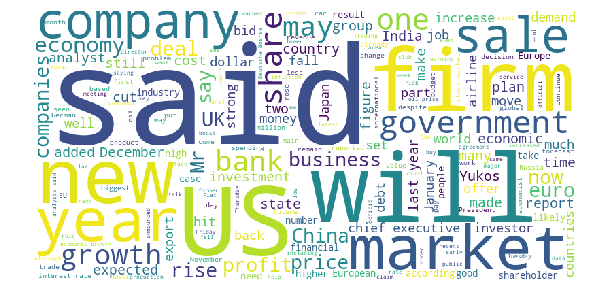

entertainment


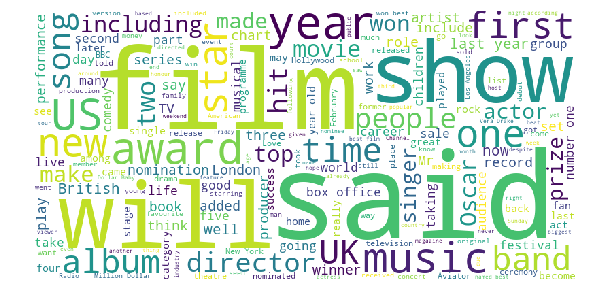

politics


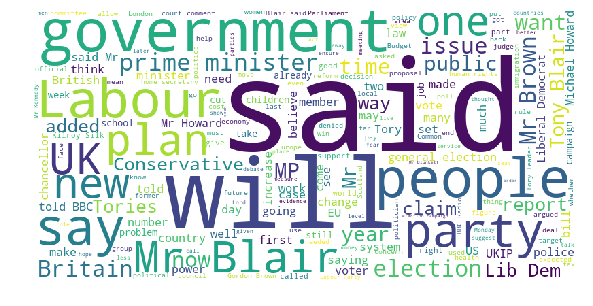

sport


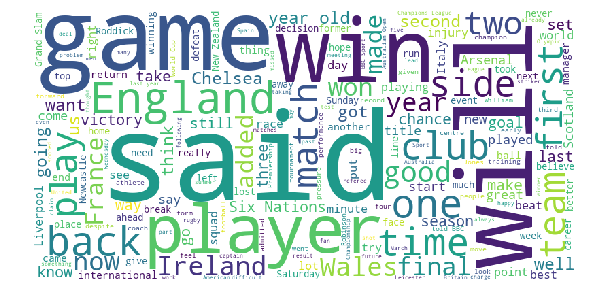

tech


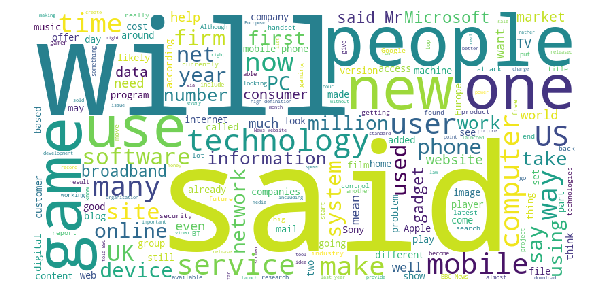

ALL Categories:


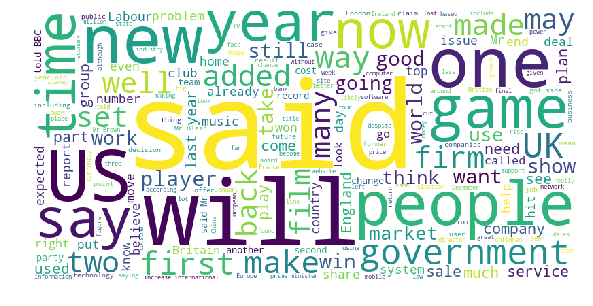

In [70]:
#WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from wordcloud import WordCloud, STOPWORDS
cat = df['category'].unique()

for i in range(0,len(cat)):
    words = ' '.join(df.loc[df['category']==cat[i], 'text'])

    wordcloud = WordCloud( 
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=800,
                          height=400
                ).generate(words)
    print(cat[i])
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

words = ' '.join(df.loc[:, 'text'])

wordcloud = WordCloud( 
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=800,
                      height=400
            ).generate(words)
print("ALL Categories:")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [77]:
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
from sklearn.model_selection import Stratified_Shuffle_Split
y = df['category']
X = df.drop(['category','id'],axis=1)
train, test = train_test_split(X,y,stratify=y)
X_train = train['lyrics'].values
y_train = train['genre'].values
X_test = test['lyrics'].values
y_test = test['genre'].values

print('before: %s ...' %y_train[:5])

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

print('after: %s ...' %y_train)

ValueError: ignored